To predict the sales of retail stores based on features like state, category of outlet, product identifier etc.,

In [1]:
# importing the neccessary libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew,norm

import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading the  data
train=pd.read_csv("train_data.csv")
date=pd.read_csv("date_to_week_id_map.csv")
product=pd.read_csv("product_prices.csv")
test=pd.read_csv("test_data.csv")

In [3]:
train.columns

Index(['date', 'product_identifier', 'department_identifier',
       'category_of_product', 'outlet', 'state', 'sales'],
      dtype='object')

In [4]:
date.columns

Index(['date', 'week_id'], dtype='object')

In [5]:
product.columns

Index(['outlet', 'product_identifier', 'week_id', 'sell_price'], dtype='object')

In [6]:
test.columns

Index(['id', 'date', 'product_identifier', 'department_identifier',
       'category_of_product', 'outlet', 'state'],
      dtype='object')

EXPLORATORY DATA ANALYSIS

In [7]:
train.shape

(395000, 7)

In [8]:
date.shape

(821, 2)

In [9]:
product.shape

(59000, 4)

In [10]:
train.nunique()

date                     790
product_identifier        50
department_identifier      6
category_of_product        3
outlet                    10
state                      3
sales                    126
dtype: int64

In [11]:
date.nunique()

date       821
week_id    118
dtype: int64

In [12]:
product.nunique()

outlet                 10
product_identifier     50
week_id               118
sell_price            112
dtype: int64

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395000 entries, 0 to 394999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   date                   395000 non-null  object
 1   product_identifier     395000 non-null  int64 
 2   department_identifier  395000 non-null  int64 
 3   category_of_product    395000 non-null  object
 4   outlet                 395000 non-null  int64 
 5   state                  395000 non-null  object
 6   sales                  395000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 21.1+ MB


In [14]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     821 non-null    object
 1   week_id  821 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [15]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59000 entries, 0 to 58999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   outlet              59000 non-null  int64  
 1   product_identifier  59000 non-null  int64  
 2   week_id             59000 non-null  int64  
 3   sell_price          59000 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 1.8 MB


Converting the dtype of date

In [16]:
# converting dtype of Date from object to Datetime
date['date'] = pd.to_datetime(date['date'])
train['date'] = pd.to_datetime(train['date'])

Checking null values

In [17]:
train.isnull().sum()

date                     0
product_identifier       0
department_identifier    0
category_of_product      0
outlet                   0
state                    0
sales                    0
dtype: int64

In [18]:
date.isnull().sum()

date       0
week_id    0
dtype: int64

In [19]:
product.isnull().sum()

outlet                0
product_identifier    0
week_id               0
sell_price            0
dtype: int64

Checking and dropping duplicate values

In [20]:
# Checking and removing any duplicates from the data
train[train.duplicated()]
train.drop_duplicates(inplace=True)
train

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales
0,2012-01-01,74,11,others,111,Maharashtra,0
1,2012-01-01,337,11,others,111,Maharashtra,1
2,2012-01-01,423,12,others,111,Maharashtra,0
3,2012-01-01,432,12,others,111,Maharashtra,0
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0
...,...,...,...,...,...,...,...
394995,2014-02-28,2932,33,drinks_and_food,333,Kerala,2
394996,2014-02-28,2935,33,drinks_and_food,333,Kerala,8
394997,2014-02-28,3004,33,drinks_and_food,333,Kerala,0
394998,2014-02-28,3008,33,drinks_and_food,333,Kerala,0


In [21]:
# Checking and removing any duplicates from the data
date[date.duplicated()]
date.drop_duplicates(inplace=True)
date

,date,week_id
0,2012-01-01,49
1,2012-01-02,49
2,2012-01-03,49
3,2012-01-04,49
4,2012-01-05,49
...,...,...
816,2014-03-27,165
817,2014-03-28,165
818,2014-03-29,166
819,2014-03-30,166


In [22]:
# Checking and removing any duplicates from the data
product[product.duplicated()]
product.drop_duplicates(inplace=True)
product

,outlet,product_identifier,week_id,sell_price
0,111,74,49,2.94
1,111,74,50,2.94
2,111,74,51,2.94
3,111,74,52,2.94
4,111,74,53,2.94
...,...,...,...,...
58995,333,3021,162,2.08
58996,333,3021,163,2.08
58997,333,3021,164,2.08
58998,333,3021,165,2.08


Merging datasets

In [23]:
# merging date and product data with same feature name week_id
data_merge = pd.merge(date,product,on=['week_id'])

In [24]:
data_merge.head()

,date,week_id,outlet,product_identifier,sell_price
0,2012-01-01,49,111,74,2.94
1,2012-01-01,49,111,337,7.44
2,2012-01-01,49,111,423,0.97
3,2012-01-01,49,111,432,4.97
4,2012-01-01,49,111,581,4.88


In [25]:
data_merge.isnull().sum()

date                  0
week_id               0
outlet                0
product_identifier    0
sell_price            0
dtype: int64

In [26]:
data_merge["date"].value_counts()

2013-11-26    500
2013-07-08    500
2013-07-27    500
2012-05-23    500
2014-02-01    500
             ... 
2014-01-02    500
2012-03-28    500
2013-04-10    500
2012-09-07    500
2012-04-12    500
Name: date, Length: 821, dtype: int64

In [27]:
train["date"].value_counts()

2013-11-26    500
2012-04-20    500
2012-09-04    500
2013-03-12    500
2012-01-07    500
             ... 
2013-07-23    500
2012-12-20    500
2014-01-02    500
2012-03-28    500
2012-04-12    500
Name: date, Length: 790, dtype: int64

In [28]:
data_merge.columns

Index(['date', 'week_id', 'outlet', 'product_identifier', 'sell_price'], dtype='object')

In [29]:
train.columns

Index(['date', 'product_identifier', 'department_identifier',
       'category_of_product', 'outlet', 'state', 'sales'],
      dtype='object')

In [30]:
# merging train and data_merge 
data=pd.merge(data_merge,train,on=['date','product_identifier','outlet'])

In [31]:
data.head()

,date,week_id,outlet,product_identifier,sell_price,department_identifier,category_of_product,state,sales
0,2012-01-01,49,111,74,2.94,11,others,Maharashtra,0
1,2012-01-01,49,111,337,7.44,11,others,Maharashtra,1
2,2012-01-01,49,111,423,0.97,12,others,Maharashtra,0
3,2012-01-01,49,111,432,4.97,12,others,Maharashtra,0
4,2012-01-01,49,111,581,4.88,21,fast_moving_consumer_goods,Maharashtra,0


In [32]:
data.shape

(395000, 9)

In [33]:
data.columns

Index(['date', 'week_id', 'outlet', 'product_identifier', 'sell_price',
       'department_identifier', 'category_of_product', 'state', 'sales'],
      dtype='object')

In [34]:
data.nunique()

date                     790
week_id                  113
outlet                    10
product_identifier        50
sell_price               107
department_identifier      6
category_of_product        3
state                      3
sales                    126
dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395000 entries, 0 to 394999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   date                   395000 non-null  datetime64[ns]
 1   week_id                395000 non-null  int64         
 2   outlet                 395000 non-null  int64         
 3   product_identifier     395000 non-null  int64         
 4   sell_price             395000 non-null  float64       
 5   department_identifier  395000 non-null  int64         
 6   category_of_product    395000 non-null  object        
 7   state                  395000 non-null  object        
 8   sales                  395000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 30.1+ MB


In [36]:
data.isnull().sum()

date                     0
week_id                  0
outlet                   0
product_identifier       0
sell_price               0
department_identifier    0
category_of_product      0
state                    0
sales                    0
dtype: int64

In [37]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
week_id,395000.0,105.070886,32.578749,49.00,77.00,105.00,133.00,161.00
outlet,395000.0,211.200000,91.161291,111.00,113.00,221.50,331.00,333.00
product_identifier,395000.0,1509.960000,809.799518,74.00,926.00,1325.00,1753.00,3021.00
sell_price,395000.0,4.987644,3.874444,0.05,2.68,3.98,6.48,44.36
department_identifier,395000.0,24.460000,6.337863,11.00,21.00,22.00,31.00,33.00
sales,395000.0,1.228919,3.595266,0.00,0.00,0.00,1.00,293.00


DATA VISUALIZATION

In [38]:
data['Year'] = data['date'].dt.year
data['Month'] = data['date'].dt.month
data['Day'] = data['date'].dt.day
data['Week'] = data['date'].dt.week

In [39]:
data["category_of_product"].value_counts()

fast_moving_consumer_goods    229100
drinks_and_food               134300
others                         31600
Name: category_of_product, dtype: int64

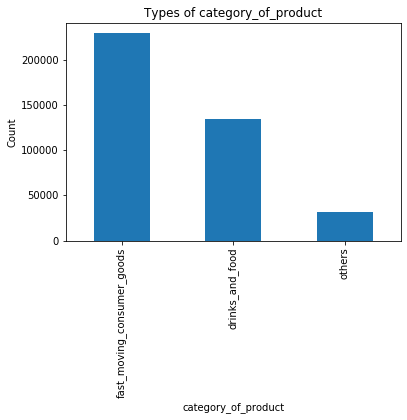

In [40]:
#Visualizing the category_of_product Data
data["category_of_product"].value_counts().plot(kind="bar")
plt.title("Types of category_of_product")
plt.xlabel("category_of_product")
plt.ylabel("Count")
plt.show()


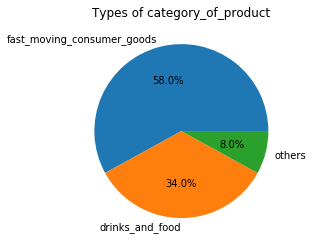

In [41]:
# Count the frequency of each value in the category_of_product column
value_counts = data['category_of_product'].value_counts()

# Create a pie chart
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Types of category_of_product')
plt.show()


In [42]:
data["state"].value_counts()

Maharashtra    158000
Kerala         118500
Telangana      118500
Name: state, dtype: int64

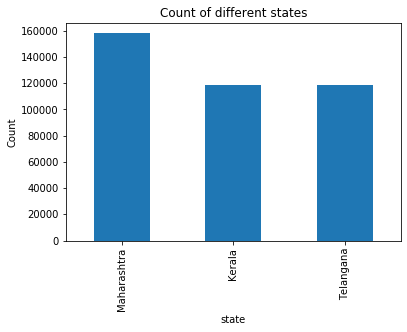

In [43]:
#Visualizing the state Data
data["state"].value_counts().plot(kind="bar")
plt.title("Count of different states")
plt.xlabel("state")
plt.ylabel("Count")
plt.show()


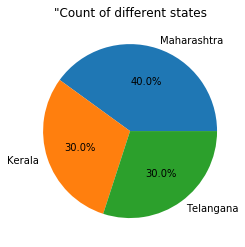

In [44]:
# Count the frequency of each value in the state column
value_counts = data['state'].value_counts()

# Create a pie chart
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
plt.title('"Count of different states')
plt.show()


plotting the graph for average weekly sales for the years 2012,2013,2014 based on week

In [45]:
data["Year"].value_counts()

2012    183000
2013    182500
2014     29500
Name: Year, dtype: int64

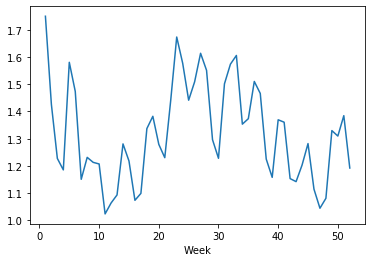

In [46]:
# Average Sales for the year 2012
sales_2012 = data[data['Year']==2012]['sales'].groupby(data['Week']).mean()

sns.lineplot(x=sales_2012.index, y=sales_2012.values)


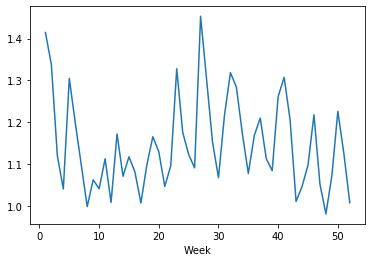

In [47]:
# Average Sales for the year 2013
sales_2013 = data[data['Year']==2013]['sales'].groupby(data['Week']).mean()

sns.lineplot(x=sales_2013.index, y=sales_2013.values)


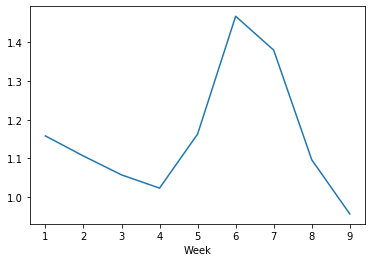

In [48]:
# Average Sales for the year 2014
sales_2014 = data[data['Year']==2014]['sales'].groupby(data['Week']).mean()

sns.lineplot(x=sales_2014.index, y=sales_2014.values)


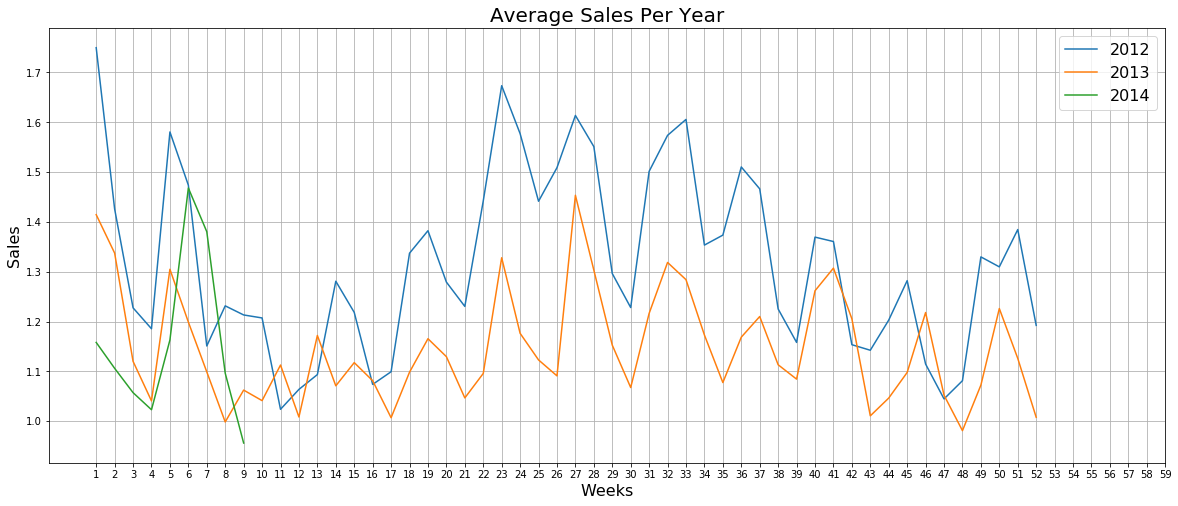

In [49]:
# Plotting the above three plot together 
plt.figure(figsize=(20,8))
sns.lineplot(x=sales_2012.index, y=sales_2012.values)
sns.lineplot(x=sales_2013.index, y=sales_2013.values)
sns.lineplot(x=sales_2014.index, y=sales_2014.values)
plt.grid()
plt.xticks(np.arange(1,60, step=1))
plt.legend(['2012', '2013', '2014'], loc='best', fontsize=16)
plt.title('Average Sales Per Year', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Weeks', fontsize=16)
plt.show()

plotting the graph for average weekly sales for the years 2012,2013,2014 based on day

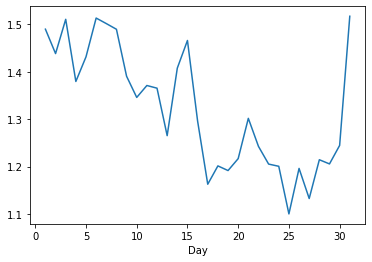

In [50]:
# Average Sales for the year 2012
sales_2012 = data[data['Year']==2012]['sales'].groupby(data['Day']).mean()

sns.lineplot(x=sales_2012.index, y=sales_2012.values)


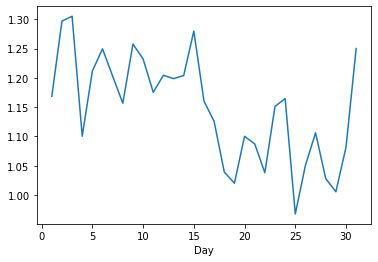

In [51]:
# Average Sales for the year 2013
sales_2013 = data[data['Year']==2013]['sales'].groupby(data['Day']).mean()

sns.lineplot(x=sales_2013.index, y=sales_2013.values)


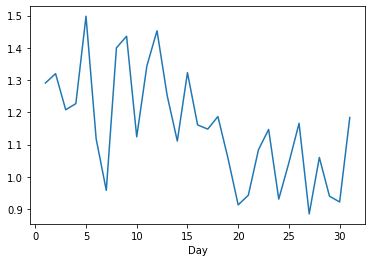

In [52]:
# Average Sales for the year 2014
sales_2014 = data[data['Year']==2014]['sales'].groupby(data['Day']).mean()

sns.lineplot(x=sales_2014.index, y=sales_2014.values)


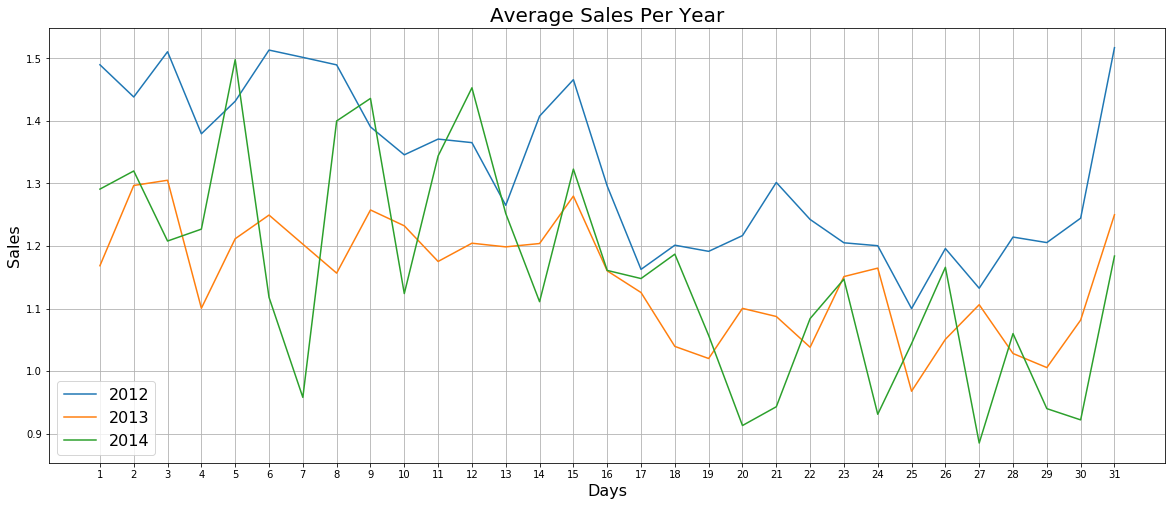

In [53]:
# Plotting the above three plot together 
plt.figure(figsize=(20,8))
sns.lineplot(x=sales_2012.index, y=sales_2012.values)
sns.lineplot(x=sales_2013.index, y=sales_2013.values)
sns.lineplot(x=sales_2014.index, y=sales_2014.values)
plt.grid()
plt.xticks(np.arange(1,32, step=1))
plt.legend(['2012', '2013', '2014'], loc='best', fontsize=16)
plt.title('Average Sales Per Year', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Days', fontsize=16)
plt.show()

plotting the graph for average sales for the category_of_product 

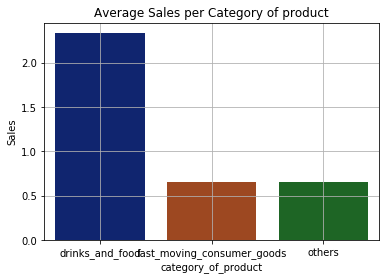

In [54]:
# Average Sales per Category of product
sales = data['sales'].groupby(data['category_of_product']).mean()
sns.barplot(x=sales.index, y=sales.values, palette='dark')
plt.grid()
plt.title('Average Sales per Category of product')
plt.xlabel('category_of_product')
plt.ylabel('Sales')
plt.show()

plotting the graph for average sales for the state

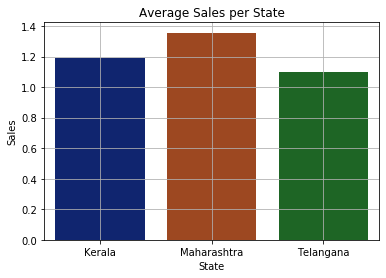

In [55]:
# Average Sales per state
sales = data['sales'].groupby(data['state']).mean()
sns.barplot(x=sales.index, y=sales.values, palette='dark')
plt.grid()
plt.title('Average Sales per State')
plt.xlabel('State')
plt.ylabel('Sales')
plt.show()

plotting scatter plot for all columns w.r.to target

In [56]:
def scatter(data, column):
    plt.figure()
    plt.scatter(data[column], data['sales'])
    plt.ylabel('sales')
    plt.xlabel(column)
    plt.grid(True)


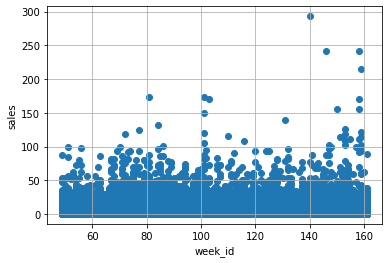

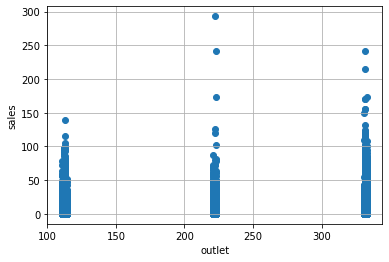

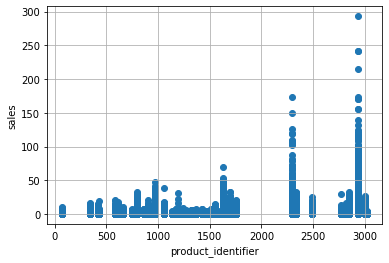

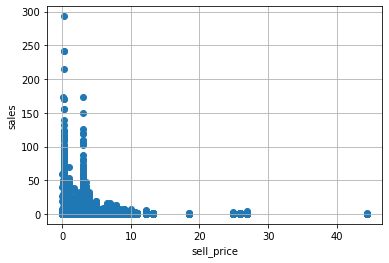

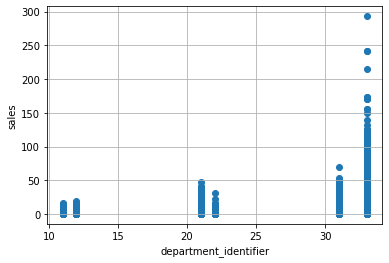

In [57]:
scatter(data, 'week_id')
scatter(data, 'outlet')
scatter(data, 'product_identifier')
scatter(data, 'sell_price')
scatter(data, 'department_identifier')

plotting Boxplot to observe the outliers

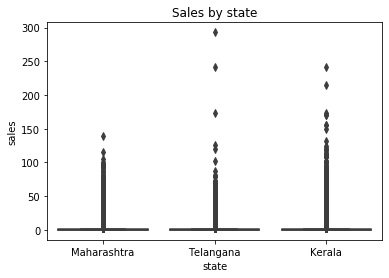

In [58]:
# plot boxplot
sns.boxplot(x="state", y="sales", data=data)

# add title and labels
plt.title("Sales by state")
plt.xlabel("state")
plt.ylabel("sales")

# show the plot
plt.show()


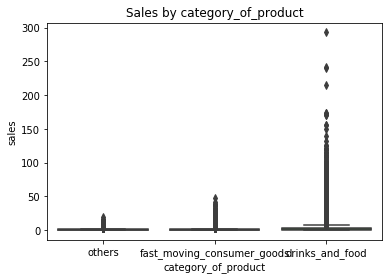

In [59]:
# plot boxplot
sns.boxplot(x="category_of_product", y="sales", data=data)

# add title and labels
plt.title("Sales by category_of_product")
plt.xlabel("category_of_product")
plt.ylabel("sales")

# show the plot
plt.show()


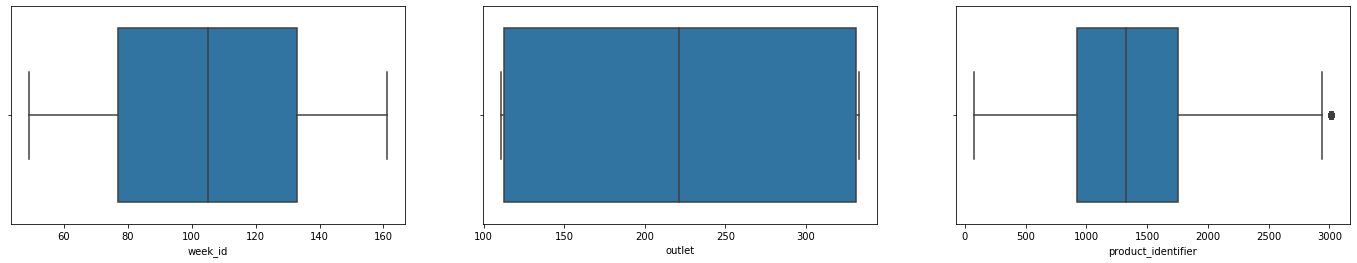

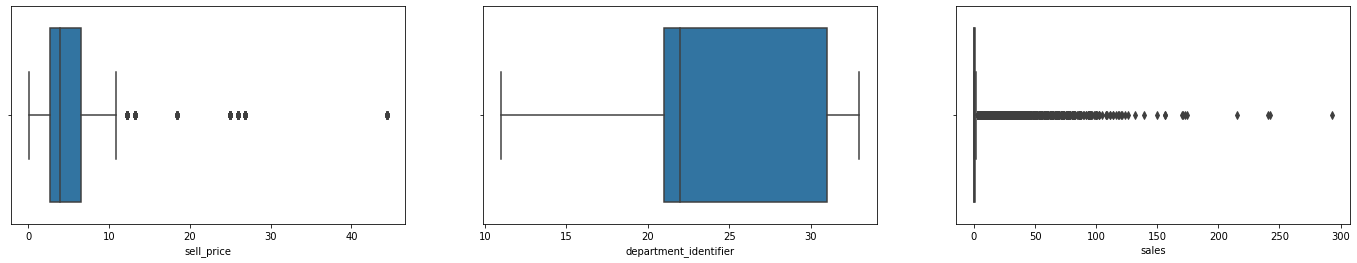

In [60]:
plt.figure(figsize = (24,4))
plt.subplot(1,3,1)
sns.boxplot(data['week_id'])
plt.subplot(1,3,2)
sns.boxplot(data['outlet'])
plt.subplot(1,3,3)
sns.boxplot(data['product_identifier'])
plt.show()
plt.figure(figsize = (24,4))
plt.subplot(1,3,1)
sns.boxplot(data['sell_price'])
plt.subplot(1,3,2)
sns.boxplot(data['department_identifier'])
plt.subplot(1,3,3)
sns.boxplot(data['sales'])
plt.show()

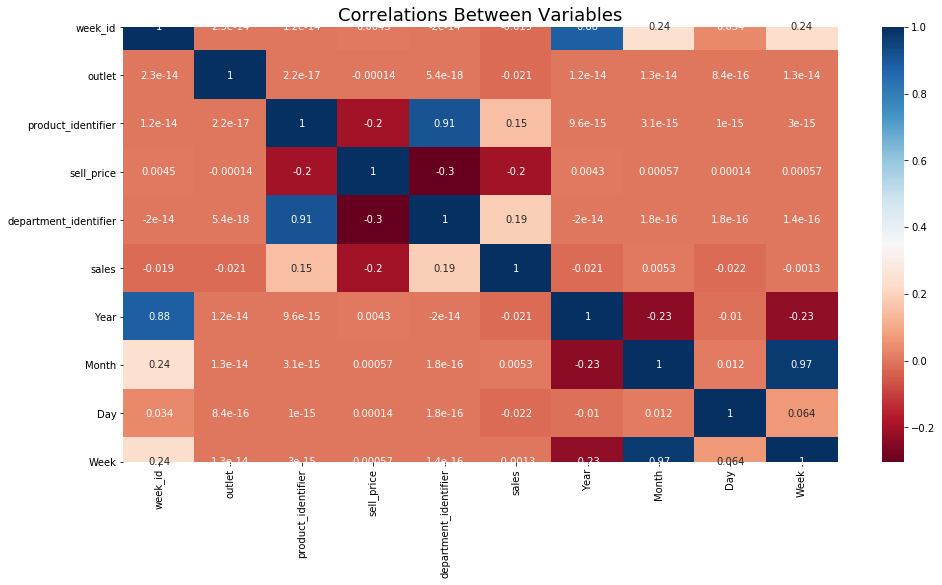

In [61]:
#correlation matrix
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=18)
plt.show() #'RdBu' says take red to blue and having white in the middle , Red is negatively correlated and Blue is positively correlated

In [62]:
data.columns

Index(['date', 'week_id', 'outlet', 'product_identifier', 'sell_price',
       'department_identifier', 'category_of_product', 'state', 'sales',
       'Year', 'Month', 'Day', 'Week'],
      dtype='object')

Retriving the numerical columns

In [63]:
data_num=data[['week_id','outlet','product_identifier','sell_price','department_identifier','sales']]
data_num.head()

,week_id,outlet,product_identifier,sell_price,department_identifier,sales
0,49,111,74,2.94,11,0
1,49,111,337,7.44,11,1
2,49,111,423,0.97,12,0
3,49,111,432,4.97,12,0
4,49,111,581,4.88,21,0


As the data was slightly right skewed we have to do normalization for numerical columns

In [64]:
# normalizing the numerical columns
data_num = (data_num - data_num.min()) / (data_num.max() - data_num.min())
data_num

,week_id,outlet,product_identifier,sell_price,department_identifier,sales
0,0.0,0.0,0.000000,0.065222,0.000000,0.000000
1,0.0,0.0,0.089243,0.166780,0.000000,0.003413
2,0.0,0.0,0.118426,0.020763,0.045455,0.000000
3,0.0,0.0,0.121479,0.111036,0.045455,0.000000
4,0.0,0.0,0.172039,0.109005,0.454545,0.000000
...,...,...,...,...,...,...
394995,1.0,1.0,0.969800,0.061611,1.000000,0.006826
394996,1.0,1.0,0.970818,0.003385,1.000000,0.027304
394997,1.0,1.0,0.994231,0.055292,1.000000,0.000000
394998,1.0,1.0,0.995589,0.043557,1.000000,0.000000


In [65]:
data["category_of_product"].value_counts()

fast_moving_consumer_goods    229100
drinks_and_food               134300
others                         31600
Name: category_of_product, dtype: int64

In [66]:
data["state"].value_counts()

Maharashtra    158000
Kerala         118500
Telangana      118500
Name: state, dtype: int64

Converting categorical to numerical columns

In [67]:
# Converting 'category_of_product' column to numerical
cop_mapping = {'fast_moving_consumer_goods': 1, 'drinks_and_food': 2, 'others': 3}
data['category_of_product'] = data['category_of_product'].map(cop_mapping)

# Converting 'state' column to numerical
state_mapping = {'Kerala': 1, 'Maharashtra': 2, 'Telangana': 3}
data['state'] = data['state'].map(state_mapping)

In [68]:
data1 = pd.concat([data_num,data['category_of_product']],axis=1)
data1

,week_id,outlet,product_identifier,sell_price,department_identifier,sales,category_of_product
0,0.0,0.0,0.000000,0.065222,0.000000,0.000000,3
1,0.0,0.0,0.089243,0.166780,0.000000,0.003413,3
2,0.0,0.0,0.118426,0.020763,0.045455,0.000000,3
3,0.0,0.0,0.121479,0.111036,0.045455,0.000000,3
4,0.0,0.0,0.172039,0.109005,0.454545,0.000000,1
...,...,...,...,...,...,...,...
394995,1.0,1.0,0.969800,0.061611,1.000000,0.006826,2
394996,1.0,1.0,0.970818,0.003385,1.000000,0.027304,2
394997,1.0,1.0,0.994231,0.055292,1.000000,0.000000,2
394998,1.0,1.0,0.995589,0.043557,1.000000,0.000000,2


In [69]:
data_final= pd.concat([data1,data['state']],axis=1)
data_final.head()

,week_id,outlet,product_identifier,sell_price,department_identifier,sales,category_of_product,state
0,0.0,0.0,0.000000,0.065222,0.000000,0.000000,3,2
1,0.0,0.0,0.089243,0.166780,0.000000,0.003413,3,2
2,0.0,0.0,0.118426,0.020763,0.045455,0.000000,3,2
3,0.0,0.0,0.121479,0.111036,0.045455,0.000000,3,2
4,0.0,0.0,0.172039,0.109005,0.454545,0.000000,1,2


In [70]:
data_final.shape

(395000, 8)

In [71]:
data_final.isnull().sum().sum()

0

Train and Test split

In [72]:
# importing neccessary libraries
from sklearn.model_selection import train_test_split

# splitting of data
X = data_final.drop(['sales'],axis=1)
y = data_final['sales']

In [73]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

MODEL BUILDING WITH SKLEARN 

Random Forest Algorithm

In [74]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [75]:
y_pred=rf.predict(X_train)

In [76]:
# Error Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.0027228240997448218
Mean Squared Error: 5.803174556947977e-05
Root Mean Squared Error: 0.007617857019495691
R-squared: 0.6095584374748408


In [77]:
rf.fit(X_test,y_test)

RandomForestRegressor(random_state=42)

In [78]:
y_preds=rf.predict(X_test)

In [79]:
# Error Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.002290587583343725
Mean Squared Error: 4.5900726508267673e-05
Root Mean Squared Error: 0.006775007491380927
R-squared: 0.7040175862040279


MODEL BUILDING WITHOUT IMPORTING FROM SCIKIT-LEARN

In [80]:
import numpy as np
import pandas as pd

class DecisionTreeRegressor: #which implements a decision tree regression algorithm
    def __init__(self, max_depth=2): # initialize the object's attributes
        self.max_depth = max_depth
    
    def fit(self, X, y): #X and y, which represent the input features and target values
        self.tree = self.build_tree(X, y, depth=0) # build_tree method to construct the decision tree using the input data and the specified max_depth
        
    def build_tree(self, X, y, depth):
        n_samples, n_features = X.shape # assigns samples and features to rows and columns 
        
        if depth == self.max_depth or n_samples == 5: #whether the maximum depth of the tree has been reached 
            return np.mean(y) #the method returns the mean of the target values, which will be used as the prediction for the leaf node.
        
        feature_idxs = np.random.choice(n_features, size=2, replace=False) #selects two random features from the input data without replacement and calls
        best_feature, best_threshold = self.find_best_split(X, y, feature_idxs) #find_best_split method to determine the best feature and threshold to split the data on
        
        if best_threshold is None: #it means that if no good split was found then return mean of target column
            return np.mean(y)
        
        left_idxs = X[:, best_feature] < best_threshold #indicate which samples in the input data should go to the left or right child node
        right_idxs = X[:, best_feature] >= best_threshold #based on whether their values for the best feature are less than or greater than or equal to the best threshold.
        
        left_tree = self.build_tree(X[left_idxs], y[left_idxs], depth+1) # recursively calls the build_tree method on the left and right subsets of the input data
        right_tree = self.build_tree(X[right_idxs], y[right_idxs], depth+1) #passing in the corresponding input and target values and increasing the depth by 1.
        
        return (best_feature, best_threshold, left_tree, right_tree)
        # the method returns a tuple containing the best feature, best threshold, and the left and right child nodes as subtrees
    
    def find_best_split(self, X, y, feature_idxs):
        best_score = float('inf') #creates a floating-point value that represents positive infinity
        best_feature = None #because it is used to keep track of the best found so far to split the data on
        best_threshold = None
        
        for feature in feature_idxs: # code loops over each feature in feature_idxs
            thresholds = np.unique(X[:, feature]) # loops over each unique threshold value for that feature
            
            for threshold in thresholds: # boolean index arrays are created to indicate which samples in the input data should go to which side
                left_idxs = X[:, feature] < threshold
                right_idxs = X[:, feature] >= threshold
                
                if np.sum(left_idxs) == 0 or np.sum(right_idxs) == 0: #checks whether there are any samples in either the left or right child node
                    continue
                
                score = self.split_score(y, y[left_idxs], y[right_idxs])
                
                if score < best_score: # if split_score is better than best score,feature,.. found, then it is updated otherwise previous best is kept
                    best_score = score
                    best_feature = feature
                    best_threshold = threshold
                    
        return best_feature, best_threshold # returns best values
    
    def split_score(self, y, y_left, y_right): # calculates the score for splitting the y target variable into two subgroups y_left and y_right
        p_left = len(y_left) / len(y) # calculates the proportion of instances in y_left compared to the total number of instances in y
        p_right = len(y_right) / len(y)
        
        score = p_left * np.var(y_left) + p_right * np.var(y_right) # calculates the score for splitting y into y_left and y_right
        # np.var() function calculates the variance of an array
        return score
    
    def predict(self, X):
        return np.array([self.traverse_tree(x, self.tree) for x in X])
    
    def traverse_tree(self, x, node):
        if isinstance(node, float):
            return node
        
        feature, threshold, left_tree, right_tree = node
        
        if x[feature] < threshold:
            if isinstance(left_tree,float):
                return left_tree
            else:
                return self.traverse_tree(x, right_tree)
        else:
            if isinstance(right_tree,float):
                return right_tree
            else:
                return self.traverse_tree(x,right_tree)
        
class RandomForestRegressor:
    def __init__(self, n_trees=15, max_depth=2, subsample_size=0.5):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.subsample_size = subsample_size
        self.trees = []
        
    def fit(self, X, y):
        for i in range(self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            n_samples = len(X)
            subsample_size = int(self.subsample_size * n_samples)
            subsample_idxs = np.random.choice(range(n_samples), size=subsample_size, replace=True)
            X_sub = X.iloc[subsample_idxs]
            y_sub = y.iloc[subsample_idxs]
            tree.fit(X_sub.values, y_sub.values)
            #tree.fit(X[subsample_idxs], y[subsample_idxs])
            self.trees.append(tree)
            
    def predict(self, X):
        if isinstance(X, (int, float)):
            X = np.array([[X]])
        elif isinstance(X, pd.Series):
            X = X.values.reshape(1, n_features)
        else:
            X = X.values
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)

In [81]:
rfr = RandomForestRegressor(n_trees=15, max_depth=2, subsample_size=0.5)

In [82]:
rfr.fit(X_train, y_train)
y_pred_train = rfr.predict(X_train)

In [83]:
import numpy as np

def mean_absolute_error(y_train, y_pred_train):
    return np.mean(np.abs(y_train - y_pred_train))

def mean_squared_error(y_train, y_pred_train):
    return np.mean((y_train - y_pred_train)**2)

def root_mean_squared_error(y_train, y_pred_train):
    return np.sqrt(mean_squared_error(y_train, y_pred_train))

def r2_score(y_train, y_pred_train):
    ssr = np.sum((y_train - y_pred_train)**2)
    sst = np.sum((y_train - np.mean(y_train))**2)
    return 1 - (ssr / sst)

# Assuming y_true and y_pred are NumPy arrays or Pandas Series
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = root_mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.006473787730749975
Mean Squared Error: 0.00014496558830469266
Root Mean Squared Error: 0.012040165626132087
R-squared: 0.024661583850982383


In [88]:
rfr.fit(X_test, y_test)
y_pred_test = rfr.predict(X_test)

In [90]:
import numpy as np

def mean_absolute_error(y_test, y_pred_test):
    return np.mean(np.abs(y_test - y_pred_test))

def mean_squared_error(y_test, y_pred_test):
    return np.mean((y_test - y_pred_test)**2)

def root_mean_squared_error(y_test, y_pred_test):
    return np.sqrt(mean_squared_error(y_test, y_pred_test))

def r2_score(y_test, y_pred_test):
    ssr = np.sum((y_test - y_pred_test)**2)
    sst = np.sum((y_test - np.mean(y_test))**2)
    return 1 - (ssr / sst)


# Assuming y_true and y_pred are NumPy arrays or Pandas Series
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.007253512756080651
Mean Squared Error: 0.00016155747138048968
Root Mean Squared Error: 0.012710526007230766
R-squared: -0.04177371435193278
